# 1 加载数据

In [1]:

import sys
sys.path.append('/notebooks/pytorch_timeseries')
from torch.optim import Optimizer, Adam
import pandas as pd
pd.options.mode.chained_assignment = None
import torch.nn as nn
from torch_timeseries.datasets.splitter import SequenceRandomSplitter
from torch_timeseries.datasets.wrapper import MultiStepTimeFeatureSet
from torch_timeseries.datasets import *
from torch_timeseries.data.scaler import MaxAbsScaler, StandarScaler
import matplotlib.pyplot as plt


# dataset = ExchangeRate('/notebooks/pytorch_timeseries/data')
dataset = SP500('/notebooks/pytorch_timeseries/data')
# dataset.df = dataset.df.set_index('date')


In [4]:
# dataset.df.drop(columns=['Name', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10', 'ROC_15','ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200']).fillna(method='ffill').fillna(method='backfill')
# dataset.dates
# pd.read_csv(dataset.file_name, parse_dates=[0])
dataset.data.shape

(1984, 70)

In [12]:
def mvts_fig(truths,start_node, end_node:int,start:int , end:int):
    # 创建图形和子图
    num_nodes = end_node - start_node 
    fig, axs = plt.subplots(end_node - start_node,figsize=(80, 6*num_nodes))
    for i in range(num_nodes):
        # 绘制时序数据
        print(i)
        axs[i].plot(truths[start:end,i])
    return fig

dataset.data[3:30, 3]

array([0.650618, 0.656254, 0.654879, 0.661157, 0.659631, 0.66912 ,
       0.659413, 0.663702, 0.658545, 0.660284, 0.652742, 0.66313 ,
       0.668226, 0.672043, 0.667557, 0.672948, 0.670691, 0.664894,
       0.667468, 0.668003, 0.675584, 0.677094, 0.674992, 0.668986,
       0.668003, 0.668539, 0.668003])

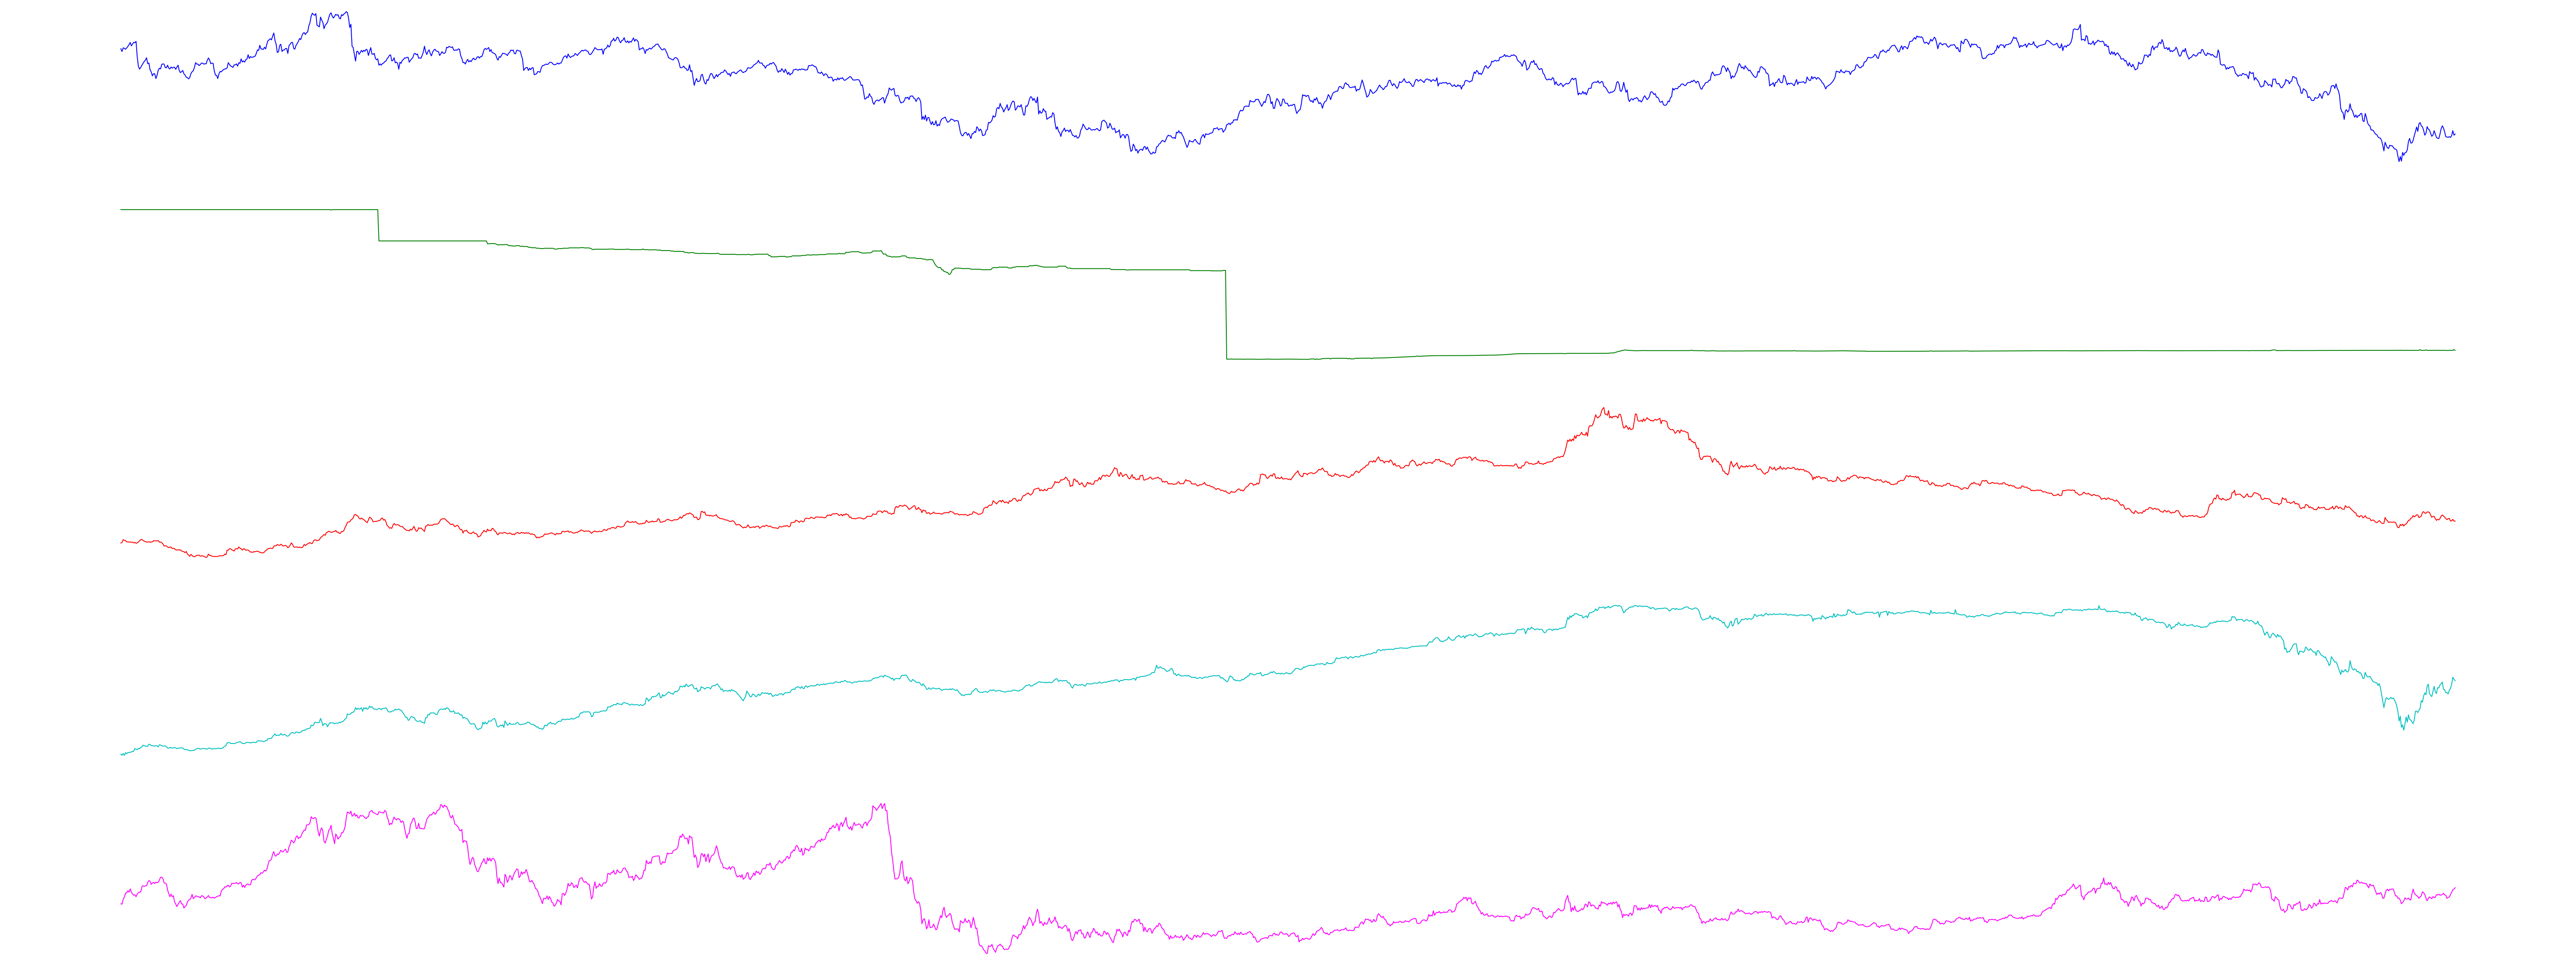

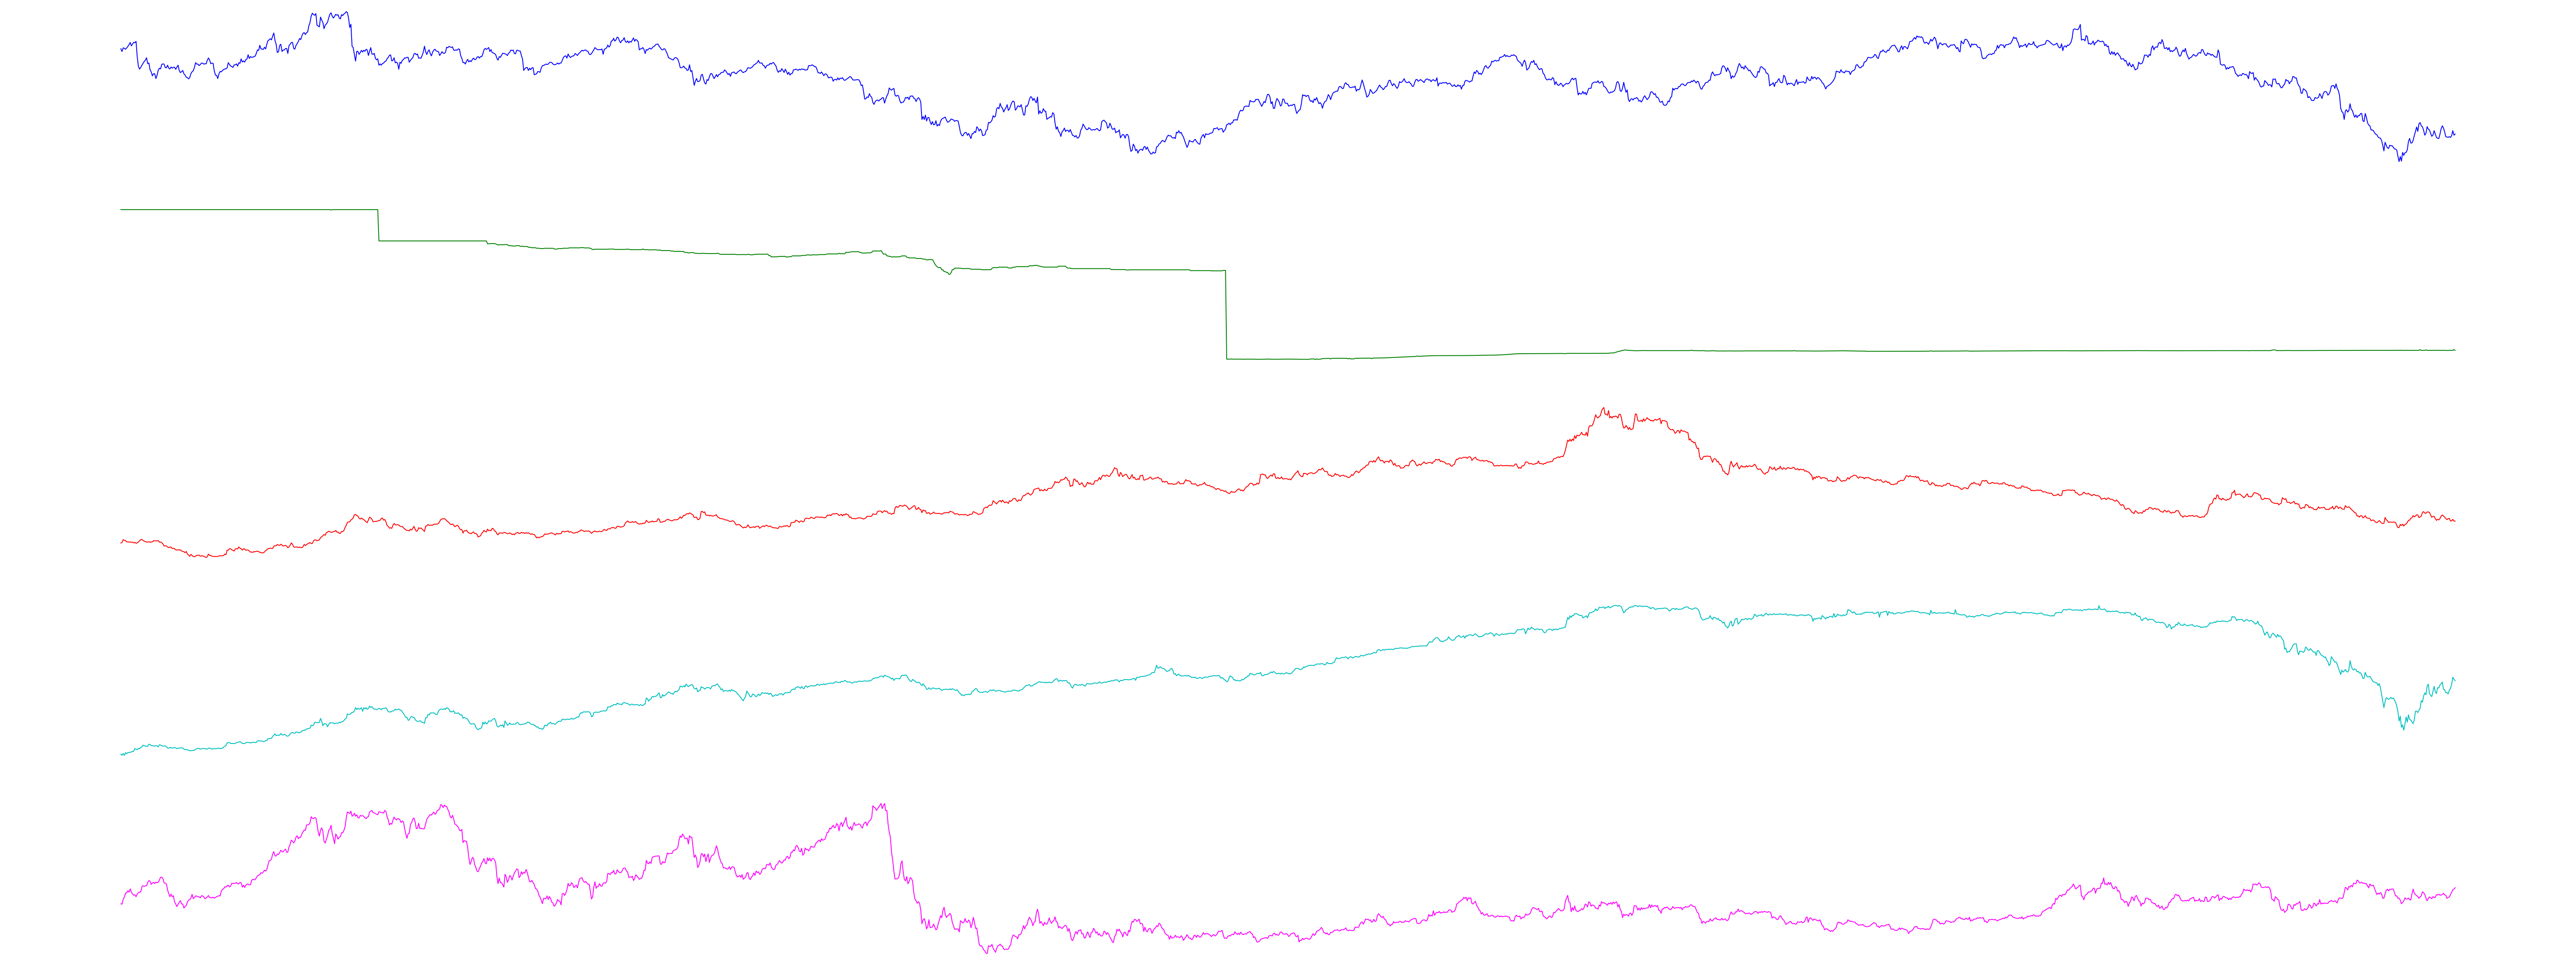

In [13]:
# fig = mvts_fig(dataset.data, 1, 3, 0,1000)
# fig

drawed_data = dataset.data[0:2000, [0,4,5,6,1]]
colors = ['blue', 'green', 'red', 'c', 'magenta']
fig, axs = plt.subplots(5,figsize=(80, 6*5))
for i in range(len(colors)):
    # 绘制时序数据
    axs[i].plot(drawed_data[:, i], color=colors[i])
    axs[i].axis('off')
fig

In [19]:
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
drawed_data = dataset.df.iloc[0:-1].copy()
selected_columns = [ 1,2,3,4,5, 6,7]
colors = ['blue', 'green', 'red', 'c', 'magenta']

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=list(range(len(drawed_data.index))), y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()


In [ ]:
mvts_fig(dataset.df)

In [11]:
# 绘制多维时序图
plt.figure(figsize=(15, 10))

# dataset.df.set_index('date', inplace=True)

# 绘制每个系列
for column in dataset.df.columns:
    plt.plot(dataset.df['date'], dataset.df[column], marker='o', label=column)

# 添加图形元素
plt.title('Multidimensional Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)



KeyError: 'date'

<Figure size 1500x1000 with 0 Axes>

In [6]:
dataset.df['date']


0      1990-01-01
1      1990-01-02
2      1990-01-03
3      1990-01-04
4      1990-01-05
          ...    
7583   2010-10-06
7584   2010-10-07
7585   2010-10-08
7586   2010-10-09
7587   2010-10-10
Name: date, Length: 7588, dtype: datetime64[ns]

## METR_LA

In [5]:
dataset = METR_LA('/notebooks/pytorch_timeseries/data')


In [11]:
import plotly.graph_objects as go

# 假设 dataset.df 是一个包含时间戳和其他数据的 DataFrame
# 并且时间戳是索引
df = dataset.df.copy()
df['avg'] = dataset.df.mean(axis=1)

# 选择要绘制的数据和颜色
# drawed_data = dataset.df.iloc[0:12].copy()
drawed_data = dataset.df.iloc[1000:1012].copy()
selected_columns = [ 1,2,3,4,5, 6,7,8,9,10,11,12,13,14,15,16,17,18]

# 创建图形
fig = go.Figure()

# 为每个选定的列添加一个线条
for i, col in enumerate(selected_columns):
    fig.add_trace(go.Scatter(x=drawed_data.index, y=drawed_data.iloc[:, col], mode='lines', name=col))

# 更新图形布局
fig.update_layout(title='Time Series Plot with Timestamps')

# 显示图形
fig.show()


In [9]:
dataset.df.index

DatetimeIndex(['2012-03-01 00:00:00', '2012-03-01 00:05:00',
               '2012-03-01 00:10:00', '2012-03-01 00:15:00',
               '2012-03-01 00:20:00', '2012-03-01 00:25:00',
               '2012-03-01 00:30:00', '2012-03-01 00:35:00',
               '2012-03-01 00:40:00', '2012-03-01 00:45:00',
               ...
               '2012-06-27 23:10:00', '2012-06-27 23:15:00',
               '2012-06-27 23:20:00', '2012-06-27 23:25:00',
               '2012-06-27 23:30:00', '2012-06-27 23:35:00',
               '2012-06-27 23:40:00', '2012-06-27 23:45:00',
               '2012-06-27 23:50:00', '2012-06-27 23:55:00'],
              dtype='datetime64[ns]', length=34272, freq=None)